# MATH 472 Homework 3
## Holly Bossart
## Due 02/06/2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv, multi_dot
#%matplotlib inline

## Problem 1
Implement iteratively reweighted least squares IRLS algorithm to reproduce the result in Example 2.5 of Computational Statistics book. 

### Part a
(a) Print your result in the format of table 2.1 using starting value = (0.95913, 0).

In [2]:
data = pd.read_csv('facerecognition.csv', delimiter = ' ')
y = data['match'].to_numpy().reshape((1042,1))
z = data['eyediff'].to_numpy().reshape((1042,1))
ones = np.ones((1042, 1))
z = np.hstack((ones, z))
n = y.size
beta = np.asarray([0.95913, 0]).reshape(2,1)
abeta0s = []
abeta1s = []
bbeta0s = []
bbeta1s = []



def update_pi(beta):
    pi = (1/(1 + np.exp(-z.dot(beta))))
    return pi

def get_b(pi):
    return -np.log(pi)

def newton_beta(beta, opt):
    # this if our first value for everything
    iteration = 0

    W = np.zeros((n,n))
    pi= update_pi(beta)
    np.fill_diagonal(W, pi*(1-pi))

    for i in range(5):
        Hessian = inv(multi_dot((z.T, W, z)))
        #print(iteration, beta, Hessian)
        iteration = iteration + 1
        
        if opt == 0:
            abeta0s.append(beta[0])
            abeta1s.append(beta[1])
            
        if opt == 1:
            bbeta0s.append(beta[0])
            bbeta1s.append(beta[1])
            
        beta = beta + Hessian.dot(z.T.dot(y - pi))
        pi = update_pi(beta)
        np.fill_diagonal(W, pi*(1-pi))
    return;

newton_beta(beta, 0)

### 1a Solution:
| Iteration, $t$ | $\beta^{(t)}$                                          | $-l''(\beta^{(t+1)})$                                                                              |
|--------------|--------------------------------------------------------|----------------------------------------------------------------------------------------------------|
| 0            | $\begin{pmatrix} 0.95913\\ 0 \end{pmatrix}$            | $\begin{bmatrix} 0.01096355 & -0.11774\\ -0.11774922 & 2.24636741 \end{bmatrix}$                   |
| 1            | $\begin{pmatrix}1.72028763\\-13.90963144\end{pmatrix}$ | $\begin{bmatrix}   0.01376919 & -0.14444378\\   -0.14444378 & 2.43426036   \end{bmatrix}$          |
| 2            | $\begin{pmatrix}1.75721969\\-13.38389891\end{pmatrix}$ | $\begin{bmatrix}    0.01399076 & -0.14439871\\    -0.14439871 & 2.40178607    \end{bmatrix}$       |
| 3            | $\begin{pmatrix}1.75870063\\-13.40003398\end{pmatrix}$ | $\begin{bmatrix}     0.01400062 & -0.1445039\\     -0.1445039 & 2.40316643     \end{bmatrix}$      |
| 4            | $\begin{pmatrix}1.75870116\\-13.40003968\end{pmatrix}$ | $\begin{bmatrix}      0.01400062 & -0.14450394\\      -0.14450394 & 2.40316692      \end{bmatrix}$ |

## Problem 1b
(b) Starting with different points.

In [3]:
# number 1b
beta = np.asarray([0, 0]).reshape(2,1)
newton_beta(beta, 1)

## Problem 1b solution:
| Iteration, t | $\beta^{(t)}$                                          | $-l''(\beta^{(t+1)})$                                                                              |
|--------------|--------------------------------------------------------|----------------------------------------------------------------------------------------------------|
| 0            | $\begin{pmatrix} 0\\ 0 \end{pmatrix}$                  | $\begin{bmatrix} 0.00878375 & -0.09433803\\ -0.09433803 & 1.79973903 \end{bmatrix}$                |
| 1            | $\begin{pmatrix}1.5016127\\-11.14408376\end{pmatrix}$  | $\begin{bmatrix}   0.01246462 & -0.12936371\\   -0.12936371 & 2.21900238   \end{bmatrix}$          |
| 2            | $\begin{pmatrix}1.74440309\\-13.26669118\end{pmatrix}$ | $\begin{bmatrix}    0.01390619 & -0.14355394\\    -0.14355394 & 2.39141906    \end{bmatrix}$       |
| 3            | $\begin{pmatrix}1.75865273\\-13.3995696\end{pmatrix}$  | $\begin{bmatrix}     0.0140003 & -0.14450065\\     -0.14450065 & 2.40312566     \end{bmatrix}$     |
| 4            | $\begin{pmatrix}1.75870116\\-13.40003968\end{pmatrix}$ | $\begin{bmatrix}      0.01400062 & -0.14450394\\      -0.14450394 & 2.40316692      \end{bmatrix}$ |

## Problem 1C: making the contour plot

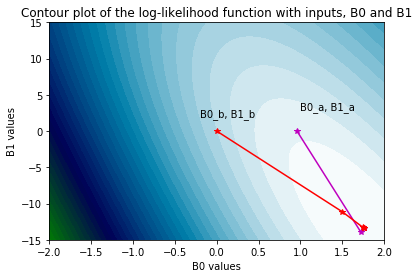

In [4]:
num_pts = 200;
b0_vals = np.linspace(-2, 2, num_pts)
b1_vals = np.linspace(-15, 15, num_pts)
B0, B1 = np.meshgrid(b0_vals, b1_vals)


# we need to iterate through the mesh now and calculate the loglikehood

def loglikelihood(y, z, beta0, beta1):
    ones = np.ones((y.size, 1))
    beta = np.array([beta0, beta1]).reshape(2,1)
    pi = (1/(1 + np.exp(-z.dot(beta)))).reshape(y.size, 1)
    b = -np.log(1-pi)
    return multi_dot((y.T, z, beta)) -b.T.dot(ones)

ll = np.zeros((B0.shape[0], B1.shape[0]))    
for i in range(B0.shape[0]):
    for j in range (B1.shape[0]):
        b0 = B0[i,j]
        b1 = B1[i,j]
        ll[i,j] = loglikelihood(y,z,b0,b1)

plt.figure
plt.contourf(B0, B1, ll, 40, cmap = 'ocean')
plt.plot(abeta0s, abeta1s, '*m-')
plt.title('Contour plot of the log-likelihood function with inputs, B0 and B1')
plt.xlabel('B0 values')
plt.ylabel('B1 values')
plt.annotate('B0_b, B1_b', (-0.2,2))
plt.annotate('B0_a, B1_a', (1,3))
plt.plot(bbeta0s, bbeta1s, '*r-')


## Problem 2
### (a) Using NR Method




Starting value: -11.0
Number of iterations: 23 
Tolerance: 1e-06
Final solution: -52555770.658200875


Starting value: -1.0
Number of iterations: 3 
Tolerance: 1e-06
Final solution: -0.19228646762465856


Starting value: 0.0
Number of iterations: 3 
Tolerance: 1e-06
Final solution: -0.1922866132255957


Starting value: 1.5
Number of iterations: 4 
Tolerance: 1e-06
Final solution: 1.7135868348079244


Starting value: 4.0
Number of iterations: 4 
Tolerance: 1e-06
Final solution: 2.8174724368887514


Starting value: 4.7
Number of iterations: 4 
Tolerance: 1e-06
Final solution: -0.19228651191810686


Starting value: 7.0
Number of iterations: 8 
Tolerance: 1e-06
Final solution: 41.040847821035634


Starting value: 8.0
Number of iterations: 24 
Tolerance: 1e-06
Final solution: -73291849.11819905


Starting value: 38.0
Number of iterations: 4 
Tolerance: 1e-06
Final solution: 42.7953778536672


Starting value: 5.106
Number of iterations: 8 
Tolerance: 1e-06
Final solution: 54.87661791171686

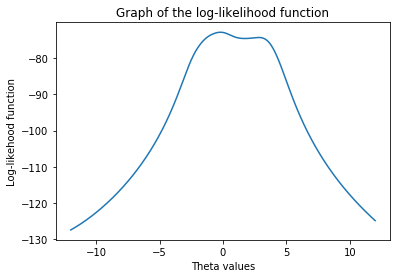

In [5]:
cauchy_vals = np.asarray([1.77,-0.23,2.76,3.8,3.47,56.75,-1.34,4.24,-2.44,3.29,3.71,-2.4,4.53,-0.07,-1.05,-13.87,-2.53,-1.75,0.27,43.21])
n = cauchy_vals.size

def loglike(theta):
    foo = -np.log([1+(cauchy_vals[i]-theta)**2 for i in range(n)]).sum(axis=0)
    return  -n*np.log(np.pi) + foo

def llprime(theta):
    temp = []
    #iterate through all observations
    for i in range(n):
        temp.append(2*(cauchy_vals[i]-theta)/((cauchy_vals[i] - theta)**2 + 1))   
    return sum(temp)

def llprime2(theta):
    temp = []
    for i in range(n):
        temp.append((-2*(theta**2-2*theta*cauchy_vals[i]+cauchy_vals[i]**2-1))/((theta**2-2*theta*cauchy_vals[i]+cauchy_vals[i]**2+1)**2))
    return sum(temp)

def step(theta):
    return llprime(theta) / llprime2(theta)

def newton_method(theta, tol, max_iterations, print_option):
    theta_vals = [theta]
    num_iterations = 0
    
    while abs(llprime(theta)) > tol and num_iterations < max_iterations:
        old_theta = theta_vals[num_iterations]
        new_theta = old_theta + step(old_theta)
        num_iterations += 1
        theta_vals.append(new_theta)
        theta = new_theta
        
        
    # at this point we have broken out of the while loop    
    if num_iterations == max_iterations:
        print("Exceeded maximum number of iterations.")
        return
        
    # this is where we hope to be if newtons went well    
    if print_option == 1:
        print('\n')
        print("Starting value: " + str(theta_vals[0]))
        sol = theta_vals[-1]
        print("Number of iterations: " + str(num_iterations) + " \nTolerance: " + str(tol))
        print("Final solution: " + str(sol))
        return
    
    if print_option == 0:
        return theta_vals[-1]

# plotting the log likelihood function
thetas = np.linspace(-12,12, 1000)
plt.figure()
plt.plot(thetas, loglike(thetas))

plt.title('Graph of the log-likelihood function')
plt.xlabel('Theta values')
plt.ylabel('Log-likehood function')

# find the MLE for theta using NR method
starting_pts = np.asarray([-11, -1, 0, 1.5, 4, 4.7, 7, 8, 38, np.mean(cauchy_vals)])
tol = 1e-6
max_iterations = 2000
printopt = 1
for val in starting_pts:
    newton_method(val, tol, max_iterations, printopt)





The Newton Raphson method is highly sensitive to the starting point. It looks like the true maximum of the likelihood function occurs at theta = -0.19228651191810686. Only a few of the above points converge to that (theta = -1.0, 0.0, 4.7.) The mean, which is tested above very last, is 5.106. When plugged into the Newton Raphson method, it does not converge to the correct value, thus is not a good starting point.

### (b) using bisection method

In [6]:
def bisection(x, a, b, tol):
    num_iterations = 0
    max_iterations = 100
    a0 = a
    b0 = b
    
    # creating lists for these values for graphing purposes later
    a_list = [a]
    b_list = [b]
    x_list = [x]
    
    # check the condition holds to continue the loop
    while ((abs(llprime(x)) > tol) and (num_iterations < max_iterations)):
        
        # check that condition holds for intermediate value theorem
        if llprime(a)*llprime(b) > 0:
            print("Bisection method fails.")
            return
        
        # if this does not fail, then we can test other conditions given in book
        if llprime(a)*llprime(x) <= 0:
            a = a
            b = x
        elif llprime(a)*llprime(x) > 0:
            a = x
            b = b
        else:
            print("Something went wrong!")
            return
        
        # updating new x values in new interval
        x = (a+b)/2;
        num_iterations+=1;
        
        # storing our new a, b, and x values at the end of a list for graphing later
        a_list.append(a)
        b_list.append(b)
        x_list.append(x)
    
    # while loop has broken at this point in the code
    # we are either within the appropriate tolerance, or reached max iterations
    if num_iterations == max_iterations:
        print("Exceeded maximum number of iterations.")
        return
        
    # this is where we hope to be if bisection went well    
    else:
        print("Number of iterations: " + str(num_iterations) + " with tolerance: " + str(tol))
        print("Final solution: " + str(x))
        print()

 


bisection(0, -1, 1, tol)

Number of iterations: 20 with tolerance: 1e-06
Final solution: -0.19228649139404297



We can see that this converges correctly to the proper value. Below, I will try use other starting points in the same range that don't find the global maximum. We can see that where it starts determines the value it converges to.

In [7]:
bisection(2, -1, 5, tol)
bisection(3, -1, 5, tol)
bisection(2, -1, 6, tol)

Number of iterations: 22 with tolerance: 1e-06
Final solution: 2.817472219467163

Number of iterations: 22 with tolerance: 1e-06
Final solution: -0.19228649139404297

Number of iterations: 21 with tolerance: 1e-06
Final solution: 2.817472457885742



## (c) Using fixed point 

In [10]:
# fixed point iteration
alphas = [1,.64,.25] # scaling factor 
iterations = 0
for alpha in alphas:
    theta = -1 
    while llprime(theta)>tol:
        theta = theta + alpha*llprime(theta) 
        iterations+=1    
    print('Fixed-point estimate for alpha = %.2f is: ' %alpha,theta)
    print('Iterations: ',iterations)
    print('Tolerance: ', tol)
    print()

Fixed-point estimate for alpha = 1.00 is:  0.9214155618890301
Iterations:  1
Tolerance:  1e-06

Fixed-point estimate for alpha = 0.64 is:  0.22970595960897922
Iterations:  2
Tolerance:  1e-06

Fixed-point estimate for alpha = 0.25 is:  -0.19228683275117225
Iterations:  13
Tolerance:  1e-06



In [11]:
alphas = [0.75,.33,.5] # scaling factor 
iterations = 0
for alpha in alphas:
    theta = -3 
    while llprime(theta)>tol:
        theta = theta + alpha*llprime(theta) 
        iterations+=1    
    print('Fixed-point estimate for alpha = %.2f is: ' %alpha,theta)
    print('Iterations: ',iterations)
    print('Tolerance: ', tol)
    print()

Fixed-point estimate for alpha = 0.75 is:  4.006962340542033
Iterations:  1
Tolerance:  1e-06

Fixed-point estimate for alpha = 0.33 is:  0.08306342983849468
Iterations:  2
Tolerance:  1e-06

Fixed-point estimate for alpha = 0.50 is:  1.671308227028022
Iterations:  3
Tolerance:  1e-06



We can see that the fixed point estimate for theta is highly dependent on starting value and alpha.

## (d) Using secant method

## Problem 3

Text(0.8, 0.17, '95% posterior \ndensity interval')

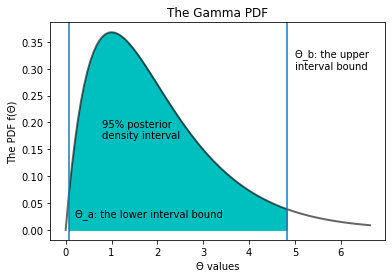

In [8]:
from scipy.stats import gamma

a = 2 #given from gamma
thetas = np.linspace(gamma.ppf(0, a), gamma.ppf(0.99, a), 100)
pdf_vals = gamma.pdf(thetas, a) #f
plt.figure()
plt.plot(thetas, pdf_vals,'r-', lw=2, alpha=0.6, label='gamma pdf', color = 'k')
plt.title('The Gamma PDF')
maxy = pdf_vals.max()
indexy = pdf_vals.argmax()

num_iterations = 0
max_iterations = 100000
area = 0
step_size = maxy / 100000

while (area <= 0.95) & (num_iterations < max_iterations):
    y = maxy - num_iterations*(step_size) 
    num_iterations += 1
    deltas = np.abs(pdf_vals - y)
    left_array = deltas[0:indexy]
    left_idx = left_array.argmin()
    right_array = deltas[indexy: -1]
    right_idx = right_array.argmin()
    
    left_intercept = thetas[left_idx]
    right_intercept = thetas[right_idx + left_array.size]
    area = gamma.cdf(right_intercept,a) - gamma.cdf(left_intercept,a)

plt.axvline(left_intercept)
plt.annotate('Θ_a: the lower interval bound', (0.2, 0.025))
plt.annotate('Θ_b: the upper \ninterval bound', (5, 0.3))
plt.ylabel('The PDF f(Θ)')
plt.xlabel('Θ values')
plt.axvline(right_intercept)

x = np.arange(left_intercept, right_intercept, 0.01)
plt.fill_between(x, gamma.pdf(x, a), color = 'c')
plt.annotate('95% posterior \ndensity interval', (0.8, 0.17))